In [34]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

% matplotlib inline

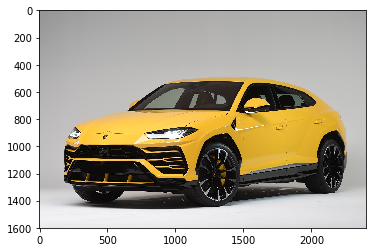

In [35]:
# loading and displaying image
f = im.open('car.jpg')
plt.imshow(f)
plt.show()

(3, 3840000)
(1600, 2400, 3)
(1600, 2400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


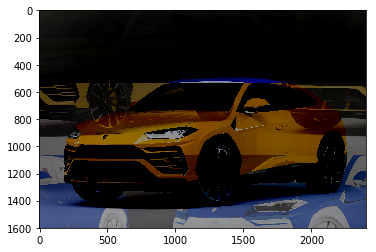

In [36]:
image = np.asarray(f).astype(float)
# reshaping image
h,w,c = image.shape
x = np.reshape(image,(c,h*w))
x = np.array([x[i] - np.mean(x[i]) for i in range(c) ])

# finding no. of elements
N = len(x[0])

# covariance matrix
cov = (x @ x.T)/N

#eigen values and eigen vectors
e_val,e_vec = np.linalg.eig(cov)

#plotting
y = e_vec.T @ x
print(y.shape)
#y = y.T
print(image.shape)
new_x = np.reshape(y,image.shape).astype(int)
print(new_x.shape)
plt.imshow(new_x)
plt.show()

# PCA fails when data is uncorrelated

(2, 5000)


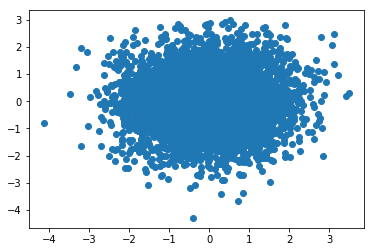

In [37]:
# taking samples from multivariate gaussian
mu = np.array([0,0])
covariance = np.identity(2)
g = np.random.multivariate_normal(mu,covariance,5000).T
print(g.shape)
plt.plot(g[0], g[1],'o')
plt.show()


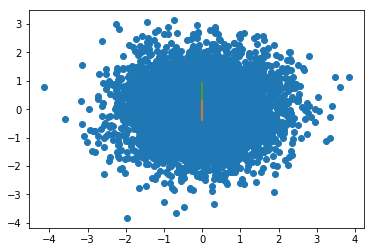

In [38]:
# finding no. of elements
N = len(g[0])

# covariance matrix
cov = (g @ g.T)/N

#eigen values and eigen vectors
e_val,e_vec = np.linalg.eig(cov)

#plotting
p = e_vec.T @ g
plt.plot(p[0], p[1],'o')

# plotting eigen vectors
plt.plot([0,0], e_vec[0])
plt.plot([0,0], e_vec[1])
plt.show()

###  PCA tries to reduce the dimension by first finding the eigen vectors which are orthogonal, but in above results they are not orthogonal. Hence , PCA fails